# Multiclass Neural Network With Own Signatures Data Set

## Creating the data set from own cropped signature images

In [1]:
import os
from os.path import isfile
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.transform import resize
from PIL import Image
import sys

### Converting jpg files to png
       We have a png file that we create for each jpg file as we can see below.

In [6]:
newfolderpath = './New folder/'
os.listdir(newfolderpath)

['.ipynb_checkpoints',
 '160401027',
 '160401043',
 '160401048',
 '170401011',
 '170401070']

In [8]:
files = os.listdir(newfolderpath)
for file in files:
    images = os.listdir(newfolderpath+file)
    for img in images:
        if img.split('.')[1] == 'jpg':
            Image.open(path + file + '/' + img).save(path + file + '/' + img.split('.')[0] + '.png')
            # We are saving jpg files as png

### Reading images and creating labels

In [126]:
path = './data_signature/'
os.listdir(path)

['150401006',
 '150401043',
 '150401051',
 '160401002',
 '160401025',
 '160401027',
 '160401043',
 '160401048',
 '160401050',
 '160401051',
 '170401011',
 '170401012',
 '170401018',
 '170401025',
 '170401040',
 '170401070',
 '170401073',
 '170401076']

In [221]:
folders = os.listdir(path)
list_of_img = []
imglabels = {'150401006':'0', '150401043':'1', '150401051':'2', 
            '160401002':'3', '160401025':'4', '160401027':'5', '160401043':'6', '160401048':'7', '160401050':'8', 
            '160401051':'9', '170401011':'10', '170401012':'11', '170401018':'12', '170401025':'13', '170401040':'14', 
            '170401070':'15', '170401073':'16', '170401076':'17'}
y = []
X_test = []
y_test = []

for folder in folders:
    
    print(folder)
    for i in range(1,32):
        imgpath = path + folder + '/' + folder + '_'
        if i<10:
            imgpath = imgpath + '0' + str(i) + '_cropped_.png'
        elif i>10 and i!=31:
            imgpath = imgpath + str(i) + '_cropped_.png'
        else:
            imgpath = imgpath + 'test_cropped_.png'

        img = plt.imread(imgpath)
        
        img = img[:,:,0]
        img = resize(img, (200, 200))
        img = np.ndarray.flatten(img)
        
        if i==31:
            X_test.append(img)
            y_test.append(imglabels[folder])
        
        else:
            list_of_img.append(img)
            y.append(imglabels[folder])

150401006
150401043
150401051
160401002
160401025
160401027
160401043
160401048
160401050
160401051
170401011
170401012
170401018
170401025
170401040
170401070
170401073
170401076


In [222]:
len(list_of_img)

540

### Creating X, y, X_test, y_test

In [223]:
X = np.array(list_of_img)
y = np.array(y, dtype=object)

In [224]:
X_test = np.array(X_test)
y_test = np.array(y_test, dtype=object)

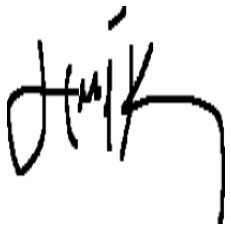

4


In [225]:
i = 140
plt.imshow(X[i].reshape(200,200), cmap ='gray')
plt.axis("off")
plt.show()
print(y[i])

In [226]:
(X.shape), (y.shape), (X_test.shape, y_test.shape)

((540, 40000), (540,), ((18, 40000), (18,)))

In [227]:
y

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '6

In [228]:
X = X / 255
X_test = X_test / 255
X.shape

(540, 40000)

In [229]:
digits = 18

examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [230]:
digits = 18

examples = y_test.shape[0]

y_test = y_test.reshape(1, examples)

Yt_new = np.eye(digits)[y_test.astype('int32')]
Yt_new = Yt_new.T.reshape(digits, examples)

In [231]:
(y.shape, Y_new.shape), (y_test.shape, Yt_new.shape)

(((1, 540), (18, 540)), ((1, 18), (18, 18)))

In [232]:
m = 540
m_test = X.shape[0] - m

#X_train, X_test = X[:m].T, X[m:].T
#Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
X_train = X[:m].T
Y_train = Y_new[:,:m]
X_test = X_test.T
Y_test = Yt_new

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:,shuffle_index], Y_train[:, shuffle_index]

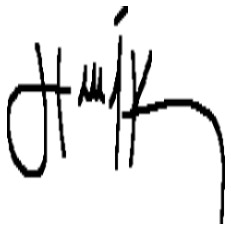

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [263]:
i = 1
plt.imshow(X_train[:,i].reshape(200,200), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

## Creating Model and Training it

### Creating the functions that we need for our model

In [240]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [241]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

### Giving the signature data to our model and training it

In [242]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  8.871927005320478
Epoch 100 cost:  2.5296359835085025
Epoch 200 cost:  2.2282585519293328
Epoch 300 cost:  1.9743259754629565
Epoch 400 cost:  1.7441666064989132
Epoch 500 cost:  1.5373054322507693
Epoch 600 cost:  1.3547307400211817
Epoch 700 cost:  1.1956405024322112
Epoch 800 cost:  1.058167664778491
Epoch 900 cost:  0.9400175588430137
Epoch 1000 cost:  0.8387741719620617
Epoch 1100 cost:  0.7520792595671855
Epoch 1200 cost:  0.6777441168853691
Epoch 1300 cost:  0.6138130609905169
Epoch 1400 cost:  0.5585907193822097
Epoch 1500 cost:  0.5106418000574803
Epoch 1600 cost:  0.46877191663242795
Epoch 1700 cost:  0.43199807420570085
Epoch 1800 cost:  0.3995158477349434
Epoch 1900 cost:  0.3706678427000408
Final cost: 0.34515951715804355


### Confusion matrix and f1-scores 

In [243]:
from sklearn.metrics import classification_report, confusion_matrix

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00   

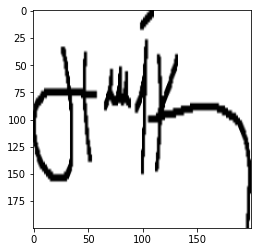

In [264]:
plt.imshow(X[:,1].reshape(200, 200), cmap ='gray')
plt.show()

## Sonuç

    Confisuon matrixi incelediğimizde f1-score ve diğer sonuçlara göre tüm tahminlerin doğru yapıldığını gözlemliyoruz. Görüntü boyutlarının 200x200 kullanılması ve veri adedinin doğru sonuç için yeterli olduğu görülmüştür. 